<a href="https://colab.research.google.com/github/komal2267g/Machine-Learning-LabActivity/blob/main/Predict%20Body%20Weight%20Using%20Height%2C%20Age%2C%20and%20Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Weight_Data.csv to Weight_Data.csv
   Weight  Height   Age Gender
0      79    1.80  35.0   Male
1      69    1.68   NaN   Male
2      73    1.82  25.0   Male
3      95    1.70  60.0   Male
4      82    1.87  27.0   Male
Shape: (10, 4)
Missing values:
 Weight    0
Height    0
Age       1
Gender    0
dtype: int64
Predicted weights:
 [56.85651025 79.56407578]
Actual weights:
 [64 69]


/tmp/ipython-input-1-1027878060.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


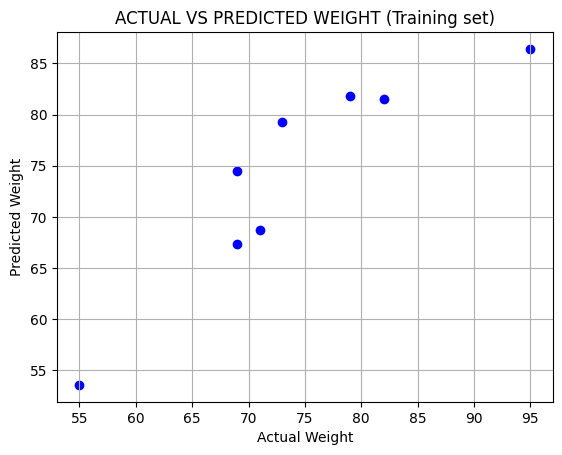

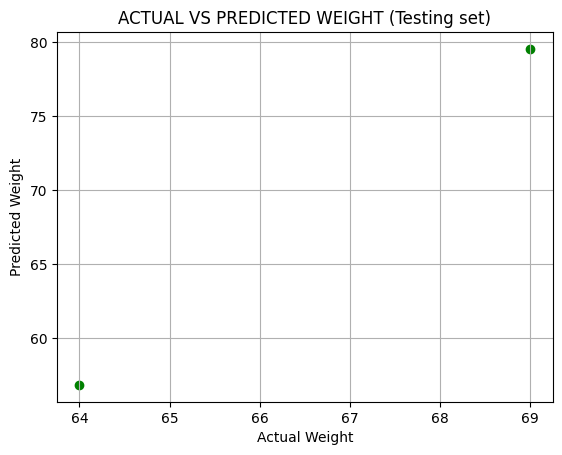

In [1]:
# Importing required libraries

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Reading the dataset
data = pd.read_csv('Weight_Data.csv')

# Display first 5 rows
print(data.head())

# Checking shape
print("Shape:", data.shape)

# Checking for null values
print("Missing values:\n", data.isnull().sum())

# Filling missing age with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Encoding Gender column (Male=1, Female=0)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Splitting into independent (X) and dependent (Y) variables
x = data[['Height', 'Age', 'Gender']].values
y = data['Weight'].values

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fitting Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the test set results
y_pred = model.predict(x_test)

# Comparing predictions with actual values
print("Predicted weights:\n", y_pred)
print("Actual weights:\n", y_test)

# Plotting predicted vs actual for training set
plt.scatter(y_train, model.predict(x_train), color='blue')
plt.title('ACTUAL VS PREDICTED WEIGHT (Training set)')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.grid(True)
plt.show()

# Plotting predicted vs actual for testing set
plt.scatter(y_test, y_pred, color='green')
plt.title('ACTUAL VS PREDICTED WEIGHT (Testing set)')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.grid(True)
plt.show()
